### HR Attrition Data

HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics.

This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives. Doing so provides measured evidence of how HR initiatives are contributing to the organization’s goals and strategies.

In this Project, we try to predict whether a give employee will leave the organization or not. The target column is Attrition We will create a model with the following steps:

• Import the relevant packages \
• Download and explore the database \
• Perform EDA, Apply dataset for preprocessing \
• Predict the target columns 

What is Employee Attrition?

Employee Attrition is the gradual reduction in staff numbers that occurs as employees retire or resign and are not replaced. Employee attrition can be costly for businesses. The company loses employee productivity, and employee knowledge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


### Load Dataset

In [2]:
data = pd.read_csv('HR_Employee_Attrition-1.csv')

In [3]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Performing EDA

In [4]:
data.shape

(2940, 35)

In [5]:
data.columns

Index(['EmployeeNumber', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,2940.0,1470.500000,848.849221,1.0,735.75,1470.5,2205.25,2940.0
Age,2940.0,36.923810,9.133819,18.0,30.00,36.0,43.00,60.0
DailyRate,2940.0,802.485714,403.440447,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.00,7.0,14.00,29.0
Education,2940.0,2.912925,1.023991,1.0,2.00,3.0,4.00,5.0
EmployeeCount,2940.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,2940.0,2.721769,1.092896,1.0,2.00,3.0,4.00,4.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.00,66.0,84.00,100.0
JobInvolvement,2940.0,2.729932,0.711440,1.0,2.00,3.0,3.00,4.0
JobLevel,2940.0,2.063946,1.106752,1.0,1.00,2.0,3.00,5.0


### Data Analysis


In [9]:
attrition_no = pd.DataFrame(data['Attrition'].value_counts())
attrition_no

,Attrition
No,2466
Yes,474


<AxesSubplot:xlabel='Age', ylabel='count'>

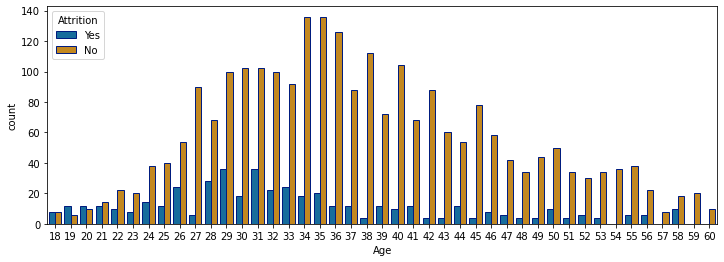

In [10]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(
x='Age',
hue = 'Attrition',
data= data,
palette= "colorblind",
ax = ax,
edgecolor= sns.color_palette("dark", n_colors = 1),)

In [11]:
df = data.drop('EmployeeNumber', axis = 1) 

df = data.drop('StandardHours', axis = 1) 

df = data.drop('EmployeeCount', axis = 1) 

df = data.drop('Over18', axis = 1) 

data

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:>

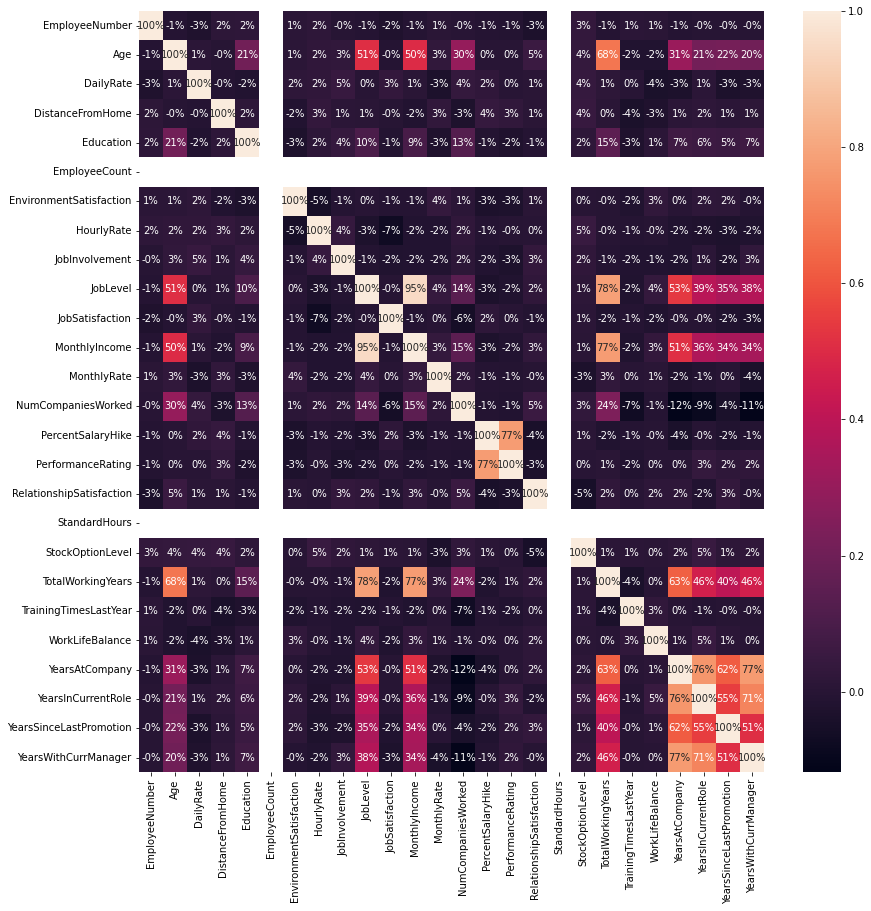

In [12]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [13]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])
        
data

C:\Users\hp\AppData\Local\Temp/ipykernel_14004/2688298428.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,23,2,624,2,0,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,1,0,31,1,113,1,7,0,1,0,...,3,0,1,10,3,2,10,7,1,7
2,2,1,19,2,805,1,1,1,4,0,...,1,0,0,7,3,2,0,0,0,0
3,3,0,15,1,820,1,2,3,1,0,...,2,0,0,8,3,2,8,7,3,0
4,4,0,9,2,312,1,1,0,3,0,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,0,18,1,494,1,22,1,3,0,...,2,0,1,17,3,2,5,2,0,3
2936,2936,0,21,2,327,1,5,0,3,0,...,0,0,1,9,5,2,7,7,1,7
2937,2937,0,9,2,39,1,3,2,1,0,...,1,0,1,6,0,2,6,2,0,3
2938,2938,0,31,1,579,2,1,2,3,0,...,3,0,0,17,3,1,9,6,0,8


In [14]:
data['Age_Years'] = data['Age']
data = data.drop('Age', axis=1)

In [15]:
df = data.drop('EmployeeNumber', axis = 1) # A number assignment

#Remove the column StandardHours
df = data.drop('StandardHours', axis = 1) #Contains only value 80 

#Remove the column EmployeeCount
df = data.drop('EmployeeCount', axis = 1) #Contains only the value 1 

#Remove the column Over18
df = data.drop('Over18', axis = 1) #Contains only the value 'Yes'

#Show the dataframe
df

,EmployeeNumber,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,0,1,2,624,2,0,1,1,0,1,...,0,0,8,0,0,6,4,0,5,23
1,1,0,1,113,1,7,0,1,0,2,...,0,1,10,3,2,10,7,1,7,31
2,2,1,2,805,1,1,1,4,0,3,...,0,0,7,3,2,0,0,0,0,19
3,3,0,1,820,1,2,3,1,0,3,...,0,0,8,3,2,8,7,3,0,15
4,4,0,2,312,1,1,0,3,0,0,...,0,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,0,1,494,1,22,1,3,0,2,...,0,1,17,3,2,5,2,0,3,18
2936,2936,0,2,327,1,5,0,3,0,3,...,0,1,9,5,2,7,7,1,7,21
2937,2937,0,2,39,1,3,2,1,0,1,...,0,1,6,0,2,6,2,0,3,9
2938,2938,0,1,579,2,1,2,3,0,3,...,0,0,17,3,1,9,6,0,8,31


### Split the Dataset

In [16]:
x = df.iloc[:, 1:df.shape[1]].values 
y = df.iloc[:, 0].values 
print(df.shape)
print(x.shape)
print(y.shape)


(2940, 34)
(2940, 33)
(2940,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

### Building Model Using Random Forest Classification algorithm

In [18]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [19]:
print(x_train[0:5])

[[   1    1  221    1   23    1    1    0    3    1   43    1    0    6
     3    2  177  730    1    1   13    1    1    0    0    1    3    1
     1    0    1    0   11]
 [   0    2  268    2    1    3    1    0    2    0   21    2    1    8
     3    2  572  317    3    0    4    0    2    0    0   17    2    1
    13    7    6    7   18]
 [   1    2   90    0   21    0    0    0    3    1   28    0    0    1
     2    1   20  554    1    0    0    0    2    0    1    1    2    2
     1    0    0    0    6]
 [   0    2  502    1   14    1    1    0    0    1   20    2    0    2
     2    0   94 1183    1    0    5    0    3    0    1    4    5    1
     4    2    2    2   10]
 [   0    2  830    2    0    2    1    0    0    1   29    1    0    8
     0    2  301  547    4    0    3    0    0    0    0   20    3    1
     1    0    0    0   20]]


In [20]:
score = forest.score(x_train,y_train)
print('randomforest classifier', np.abs(score)*100)

randomforest classifier 62.176870748299315


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forest.predict(x_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy is - ',(TP+TN)/(TP+TN+FP+FN))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Model Testing Accuracy is -  nan


C:\Users\hp\AppData\Local\Temp/ipykernel_14004/2492449179.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  print('Model Testing Accuracy is - ',(TP+TN)/(TP+TN+FP+FN))


In [22]:
importances = pd.DataFrame({
                'feature':df.iloc[:, 1:df.shape[1]].columns,
                'importance':np.round(forest.feature_importances_,3)
                })
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.100
DailyRate,0.089
HourlyRate,0.087
MonthlyRate,0.082
DistanceFromHome,0.061
TotalWorkingYears,0.056
Age_Years,0.055
PercentSalaryHike,0.054
YearsAtCompany,0.046


<AxesSubplot:xlabel='feature'>

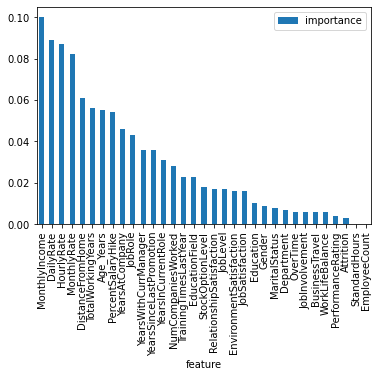

In [23]:
importances.plot.bar()

### Randomforest Classifier Score - 99.50113378684807

### Prepared by: Kumar Abhinav